In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import pandas
import pynumdiff
import scipy.fftpack
from IPython.display import display,SVG
import figurefirst
fifi = figurefirst

In [18]:
from Young3DSonicAnemometer import read_young_wind_data_to_pandas as read_wind_data_to_pandas 
from Young3DSonicAnemometer import plot_wind as plot_wind

In [19]:
def get_gamma(dt, freq, timeseries_length=None):
    try:
        if dt == 0.1:
            log_g = np.log(freq)*(-1.5) -4
        if dt == 0.01:
            log_g = np.log(freq)*(-1.5) -1.8
        if dt == 0.001:
            log_g = np.log(freq)*(-1.5) -1.2
            
        return np.exp(log_g)
    
    except:
        log_gs = []
        for f in freq:
            if dt == 0.1:
                log_gs.append(np.log(freq)*(-1.5) -4) 
            if dt == 0.01:
                log_gs.append(np.log(freq)*(-1.5) -1.8) 
            if dt == 0.001:
                log_gs.append(np.log(freq)*(-1.5) -1.2) 
            
        return np.exp(np.array(log_gs))
            


In [20]:
dataframe = read_wind_data_to_pandas('20180430_114137_Young3DWind.hdf5')

/home/caveman/BMD2/lib/python3.5/site-packages/pandas/core/dtypes/dtypes.py:271: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


In [21]:
wind_xy = np.vstack((dataframe.wind_x, dataframe.wind_y))

In [22]:
wind_speed = np.linalg.norm( wind_xy, axis=0) / 100
t = dataframe.time - dataframe.time.min()
wind_speed.shape

(103290,)

In [23]:
figure_layout = 'fig_6_wind.svg'
cutoff_freq = 1e-2

# Data

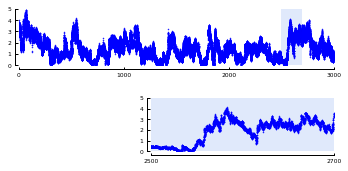

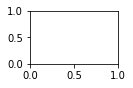

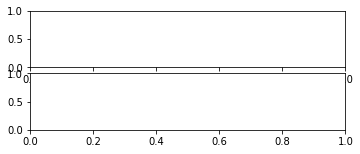

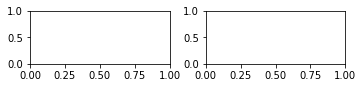

In [24]:
layout = fifi.svg_to_axes.FigureLayout(figure_layout, autogenlayers=True, 
                                           make_mplfigures=True, hide_layers=[])

ax = layout.axes[('data', 'data')]

ax.plot(t, wind_speed, '.', color='blue', markersize=1, zorder=-10)
ax.fill_between([2500, 2700], 0, 5, edgecolor='none', facecolor='cornflowerblue', alpha=0.2, zorder=-20)

ax.set_rasterization_zorder(0)
ax.set_xlim(0, 3000)
ax.set_ylim(0, 5)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [0, 1,2,3,4,5],
                                 xticks = [0, 1000, 2000, 3000],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})


ax = layout.axes[('data', 'data_zoom')]

ax.plot(t, wind_speed, '.', color='blue', markersize=1, zorder=-10)
ax.fill_between([2500, 2700], 0, 5, edgecolor='none', facecolor='cornflowerblue', alpha=0.2, zorder=-20)

ax.set_rasterization_zorder(0)
ax.set_xlim(2500, 2700)
ax.set_ylim(0, 5)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [0, 1,2,3,4,5],
                                 xticks = [2500, 2700],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})

fifi.mpl_functions.set_fontsize(ax, 6)

layout.append_figure_to_layer(layout.figures['data'], 'data', cleartarget=True)
layout.write_svg(figure_layout)

# Spectra

In [25]:
def plot_power_spectra(x, t, cutoff_freq=None, ax=None):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        
    ax.set_yscale('log')
    ax.set_xscale('log')
        
    yf = scipy.fftpack.fft(x)
    N = len(t)
    dt = np.mean(np.diff(t))
    xf = np.linspace(0.0, 1.0/(2.0*dt), N/2)
    
    P = 2.0/N * np.abs(yf[:N//2])
    ax.plot(xf, P, color='black', zorder=-10)
    
    if cutoff_freq is not None:
        ax.vlines(cutoff_freq, 1e-6, 1e1, color='red')

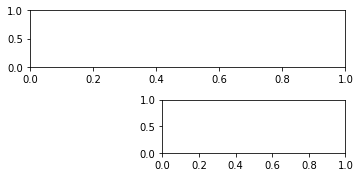

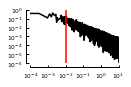

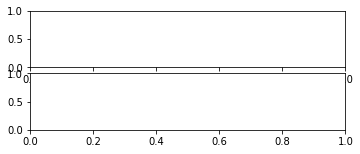

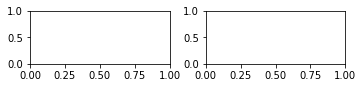

In [26]:
layout = fifi.svg_to_axes.FigureLayout(figure_layout, autogenlayers=True, 
                                           make_mplfigures=True, hide_layers=[])

ax = layout.axes[('spectra', 'spectra')]
plot_power_spectra(wind_speed, t, cutoff_freq=cutoff_freq, ax=ax)

ax.set_ylim(1e-6, 1e0)
ax.set_xlim(1e-4, 1e1)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 xticks=[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1], 
                                 yticks=[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})

fifi.mpl_functions.set_fontsize(ax, 6)


layout.append_figure_to_layer(layout.figures['spectra'], 'spectra', cleartarget=True)
layout.write_svg(figure_layout)

In [27]:
dt = np.mean(np.diff(t))
print('dt: ', dt)
idx = np.where( (t>2500)*(t<2700) )[0]
data_zoom = wind_speed[idx]

dt:  0.03136922689701064


/home/caveman/BMD2/lib/python3.5/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [12]:
tvgamma = get_gamma(0.01, cutoff_freq)
print(tvgamma)

165.29888822158654


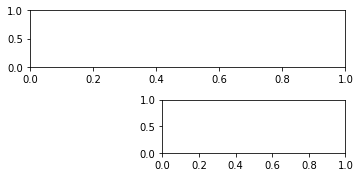

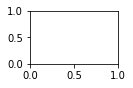

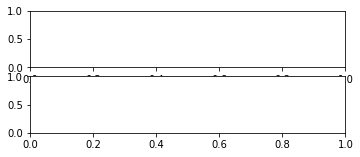

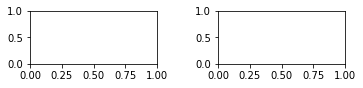

In [34]:
layout = fifi.svg_to_axes.FigureLayout(figure_layout, autogenlayers=True, 
                                           make_mplfigures=True, hide_layers=[])


In [35]:
method = 'savgoldiff'
method_parent = 'linear_model'
params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](data_zoom, dt, tvgamma=tvgamma)
x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](wind_speed, dt, params)

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

In [36]:

ax = layout.axes[('smooth', 'pos')]

ax.fill_between([400, 800], 0, 5, edgecolor='none', facecolor='gray', alpha=0.2, zorder=-20)
ax.plot(t, wind_speed, '.', color='blue', markersize=1, zorder=-10)
ax.set_rasterization_zorder(0)
ax.plot(t, x_smooth, color='red')

ax.set_xlim(0, 3000)
ax.set_ylim(0, 5)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [0, 1,2,3,4,5],
                                 xticks = [0, 1000, 2000, 3000],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})
ax.set_xticklabels([])

ax = layout.axes[('smooth', 'vel')]

ax.plot(t, xdot_smooth, color='red')
ax.fill_between([400, 800], -0.2, 0.2, edgecolor='none', facecolor='gray', alpha=0.2, zorder=-20)





ax.set_xlim(0, 3000)
ax.set_ylim(-.2, .2)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [-0.2, 0, 0.2],
                                 xticks = [0, 1000, 2000, 3000],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})

fifi.mpl_functions.set_fontsize(ax, 6)

layout.append_figure_to_layer(layout.figures['smooth'], 'smooth', cleartarget=True)
layout.write_svg(figure_layout)

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

KeyboardInterrupt: 

Process ForkPoolWorker-98:
Process ForkPoolWorker-127:
Process ForkPoolWorker-107:
Process ForkPoolWorker-121:
Process ForkPoolWorker-103:
Process ForkPoolWorker-99:
Process ForkPoolWorker-126:
Process ForkPoolWorker-102:
Process ForkPoolWorker-109:
Process ForkPoolWorker-124:
Process ForkPoolWorker-120:
Process ForkPoolWorker-125:
Process ForkPoolWorker-105:
Process ForkPoolWorker-97:
Process ForkPoolWorker-104:
Process ForkPoolWorker-108:
Process ForkPoolWorker-101:
Process ForkPoolWorker-117:
Process ForkPoolWorker-110:
Process ForkPoolWorker-106:
Process ForkPoolWorker-100:
Process ForkPoolWorker-112:
Process ForkPoolWorker-114:
Process ForkPoolWorker-116:
Process ForkPoolWorker-113:
Process ForkPoolWorker-122:
Process ForkPoolWorker-118:
Traceback (most recent call last):
Process ForkPoolWorker-128:
Process ForkPoolWorker-119:
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 

  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    se

  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 342, in get
    with self._rlock:
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes


/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

KeyboardInterrupt: 

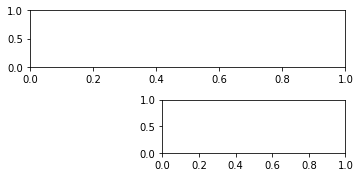

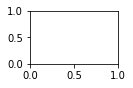

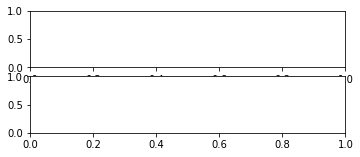

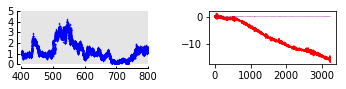

In [38]:
layout = fifi.svg_to_axes.FigureLayout(figure_layout, autogenlayers=True, 
                                           make_mplfigures=True, hide_layers=[])

ax = layout.axes[('smooth_zoom', 'pos')]

ax.plot(t, wind_speed, '.', color='blue', markersize=1, zorder=-10)
ax.set_rasterization_zorder(0)
ax.plot(t, x_smooth, color='red')
ax.fill_between([400, 800], 0, 5, edgecolor='none', facecolor='gray', alpha=0.2, zorder=-20)

ax.set_xlim(400, 800)
ax.set_ylim(0, 5)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [0, 1,2,3,4,5],
                                 xticks = [400, 500, 600, 700, 800],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})


ax = layout.axes[('smooth_zoom', 'vel')]

ax.plot(t, xdot_smooth, color='red')
ax.fill_between([400, 800], -0.2, 0.2, edgecolor='none', facecolor='gray', alpha=0.2, zorder=-20)


# other methods
if 1:
    method = 'butterdiff'
    method_parent = 'smooth_finite_difference'
    params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](data_zoom, dt, tvgamma=tvgamma)
    x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](wind_speed, dt, params)  
    ax.plot(t, xdot_smooth, color='purple', linewidth=0.3)
    
    method = 'constant_acceleration'
    method_parent = 'kalman_smooth'
    params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](data_zoom, dt, tvgamma=tvgamma)
    x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](wind_speed, dt, params)  
    ax.plot(t, xdot_smooth, color='blue', linewidth=0.3)
    
    method = 'jerk'
    method_parent = 'total_variation_regularization'
    params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](data_zoom, dt, tvgamma=tvgamma)
    x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](wind_speed, dt, params)  
    ax.plot(t, xdot_smooth, color='green', linewidth=0.3)


ax.set_xlim(400, 500)
ax.set_ylim(-0.2, 0.2)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [-0.2, 0, 0.2],
                                 xticks = [400, 500, 600, 700, 800],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})

fifi.mpl_functions.set_fontsize(ax, 6)

layout.append_figure_to_layer(layout.figures['smooth_zoom'], 'smooth_zoom', cleartarget=True)
layout.write_svg(figure_layout)

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

(400, 500)

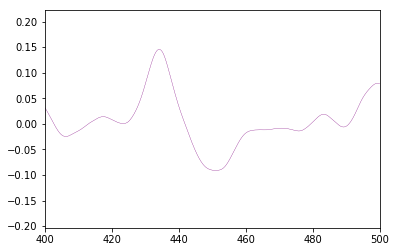

In [41]:
method = 'butterdiff'
method_parent = 'smooth_finite_difference'
params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](data_zoom, dt, tvgamma=tvgamma)
x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](wind_speed, dt, params)  

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t, xdot_smooth, color='purple', linewidth=0.3)
ax.set_xlim(400, 500)

ValueError: x and y must have same first dimension, but have shapes (103290,) and (3188,)

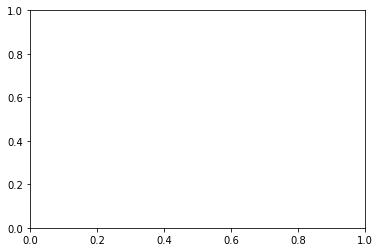

In [73]:

method = 'constant_acceleration'
method_parent = 'kalman_smooth'
params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](data_zoom[0:2000], dt, tvgamma=tvgamma)
x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](wind_speed[idx], dt, params)  

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(t, xdot_smooth, color='purple', linewidth=0.3)
#ax.set_xlim(400, 500)



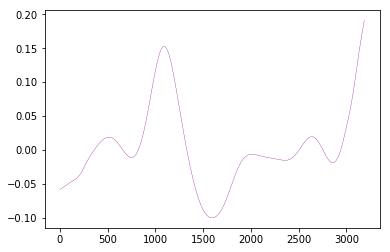

In [76]:
plt.plot(xdot_smooth, color='purple', linewidth=0.3)

In [65]:
idx = np.where((t>400)*(t<500))

/home/caveman/BMD2/lib/python3.5/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [66]:
idx

(array([12752, 12753, 12754, ..., 15937, 15938, 15939]),)

In [67]:
method = 'jerk_sliding'
method_parent = 'total_variation_regularization'
params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](data_zoom[0:2000], dt, tvgamma=tvgamma)
x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](wind_speed[idx], dt, params)  
#ax.plot(t, xdot_smooth, color='green', linewidth=0.3)

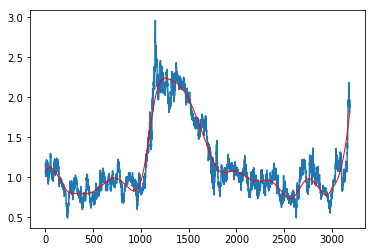

In [72]:
plt.plot(wind_speed[idx])
plt.plot(x_smooth, color='red', linewidth=1)



In [46]:
params

[5242.975000000016]

In [47]:
x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](data_zoom, dt, params)  

In [48]:
len(xdot_smooth)

6375

In [49]:
len(data_zoom)

6375